# Importing libraries

In [19]:
import os
import extract_elivation

In [20]:
import pdal
import geopandas

# fetch Data

In [21]:
import geopandas as gpd
from shapely.geometry import Polygon

MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]
polygon = Polygon(((MINX, MINY), (MINX, MAXY), (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))

region = "IA_FullState"
crs = 4326

df = extract_elivation.get_elevation(polygon, crs, region)

POLYGON((-10436887.43333523 5148706.389047224, -10436887.43333523 5149217.145836504, -10435905.484106943 5149217.145836504, -10435905.484106943 5148706.389047224, -10436887.43333523 5148706.389047224))
([-10436887.43333523, -10435905.484106943],[5148706.389047224, 5149217.145836504])
[[-93.75174029  41.91879634 318.22      ]
 [-93.74745838  41.91870784 315.8       ]
 [-93.74744616  41.91870563 315.76      ]
 ...
 [-93.7483142   41.92129829 317.4       ]
 [-93.74858226  41.92108126 317.59      ]
 [-93.75506486  41.92111976 314.96      ]]


In [22]:
df

,Elevation,geometry
0,318.22,POINT Z (-93.75174 41.91880 318.22000)
1,315.80,POINT Z (-93.74746 41.91871 315.80000)
2,315.76,POINT Z (-93.74745 41.91871 315.76000)
3,315.70,POINT Z (-93.74743 41.91870 315.70000)
4,315.74,POINT Z (-93.74742 41.91870 315.74000)
...,...,...
403326,317.32,POINT Z (-93.74832 41.92115 317.32000)
403327,317.59,POINT Z (-93.74812 41.92130 317.59000)
403328,317.40,POINT Z (-93.74831 41.92130 317.40000)
403329,317.59,POINT Z (-93.74858 41.92108 317.59000)


# Terrain visualization

In [23]:
df

,Elevation,geometry
0,318.22,POINT Z (-93.75174 41.91880 318.22000)
1,315.80,POINT Z (-93.74746 41.91871 315.80000)
2,315.76,POINT Z (-93.74745 41.91871 315.76000)
3,315.70,POINT Z (-93.74743 41.91870 315.70000)
4,315.74,POINT Z (-93.74742 41.91870 315.74000)
...,...,...
403326,317.32,POINT Z (-93.74832 41.92115 317.32000)
403327,317.59,POINT Z (-93.74812 41.92130 317.59000)
403328,317.40,POINT Z (-93.74831 41.92130 317.40000)
403329,317.59,POINT Z (-93.74858 41.92108 317.59000)


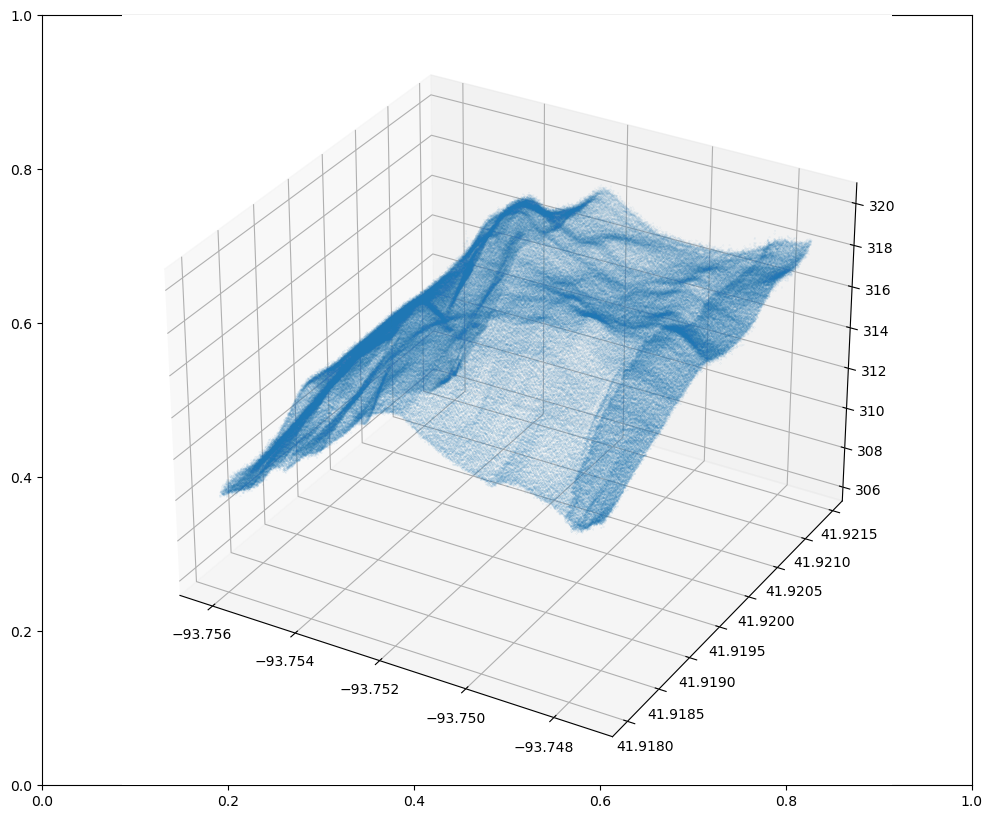

In [24]:

extract_elivation.plot_terrain_3d(df, size=0.002)

In [25]:
# converting to a crs that uses meter
df= df.set_crs(epsg=3857)
df['geometry'] = df['geometry'].to_crs(3857)
df = df.set_crs(epsg=3857)
df

,Elevation,geometry
0,318.22,POINT Z (-93.75174 41.91880 318.22000)
1,315.80,POINT Z (-93.74746 41.91871 315.80000)
2,315.76,POINT Z (-93.74745 41.91871 315.76000)
3,315.70,POINT Z (-93.74743 41.91870 315.70000)
4,315.74,POINT Z (-93.74742 41.91870 315.74000)
...,...,...
403326,317.32,POINT Z (-93.74832 41.92115 317.32000)
403327,317.59,POINT Z (-93.74812 41.92130 317.59000)
403328,317.40,POINT Z (-93.74831 41.92130 317.40000)
403329,317.59,POINT Z (-93.74858 41.92108 317.59000)


## Sampling

In [26]:
# actual subsampling
dfs = extract_elivation.subsample(df, 2)
dfs

,Elevation,geometry
0,307.499015,POINT (-93.75591 41.92106)
1,309.433184,POINT (-93.75571 41.92045)
2,311.337884,POINT (-93.75549 41.91953)
3,313.335724,POINT (-93.75445 41.91939)
4,315.295194,POINT (-93.75235 41.91922)
5,317.457156,POINT (-93.75000 41.92001)
6,318.720444,POINT (-93.75155 41.91991)


In [27]:
# converting to the original crs
dfs = dfs.set_crs(epsg=3857)
dfs['geometry'] = dfs['geometry'].to_crs(4326)
dfs = dfs.set_crs(epsg=4326)
dfs

,Elevation,geometry
0,307.499015,POINT (-0.00084 0.00038)
1,309.433184,POINT (-0.00084 0.00038)
2,311.337884,POINT (-0.00084 0.00038)
3,313.335724,POINT (-0.00084 0.00038)
4,315.295194,POINT (-0.00084 0.00038)
5,317.457156,POINT (-0.00084 0.00038)
6,318.720444,POINT (-0.00084 0.00038)


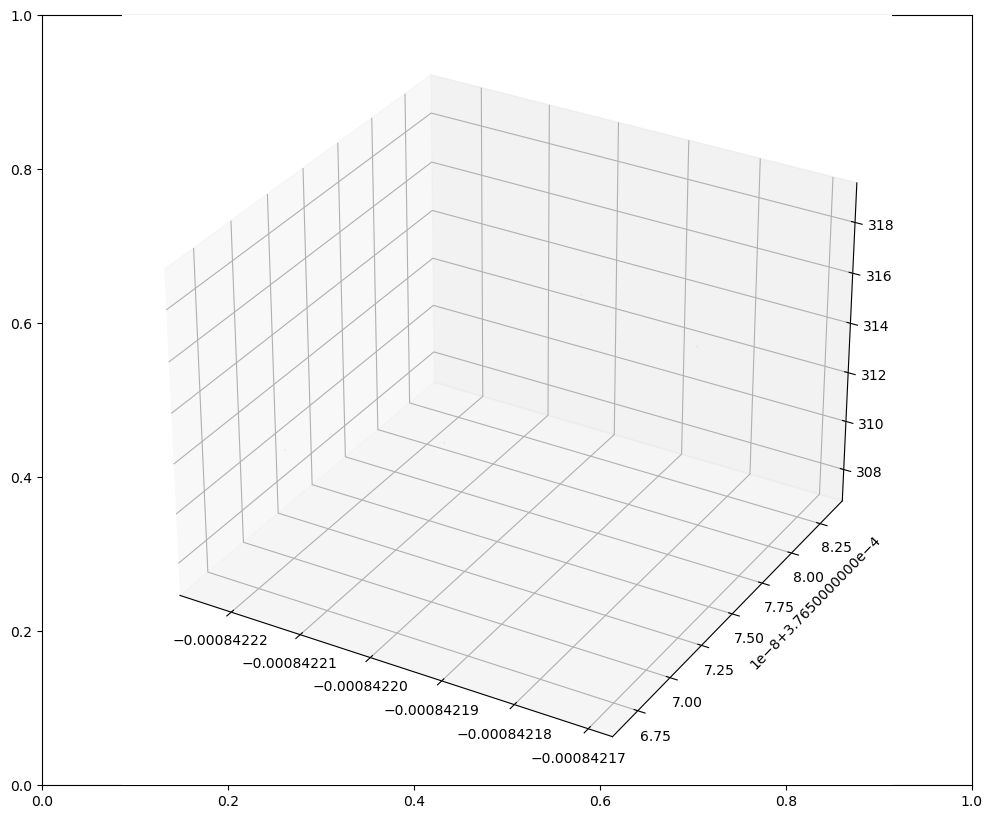

In [28]:
# plotting the subsampled point cloud data
extract_elivation.plot_terrain_3d(dfs, size=0.002)